# Devasy Patel
# 20BCE057
# Practicla 2a

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequalityred/winequality-red.csv


In [2]:
df = pd.read_csv('/kaggle/input/winequalityred/winequality-red.csv')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [6]:
df.shape

(1596, 12)

In [7]:
import seaborn as sn

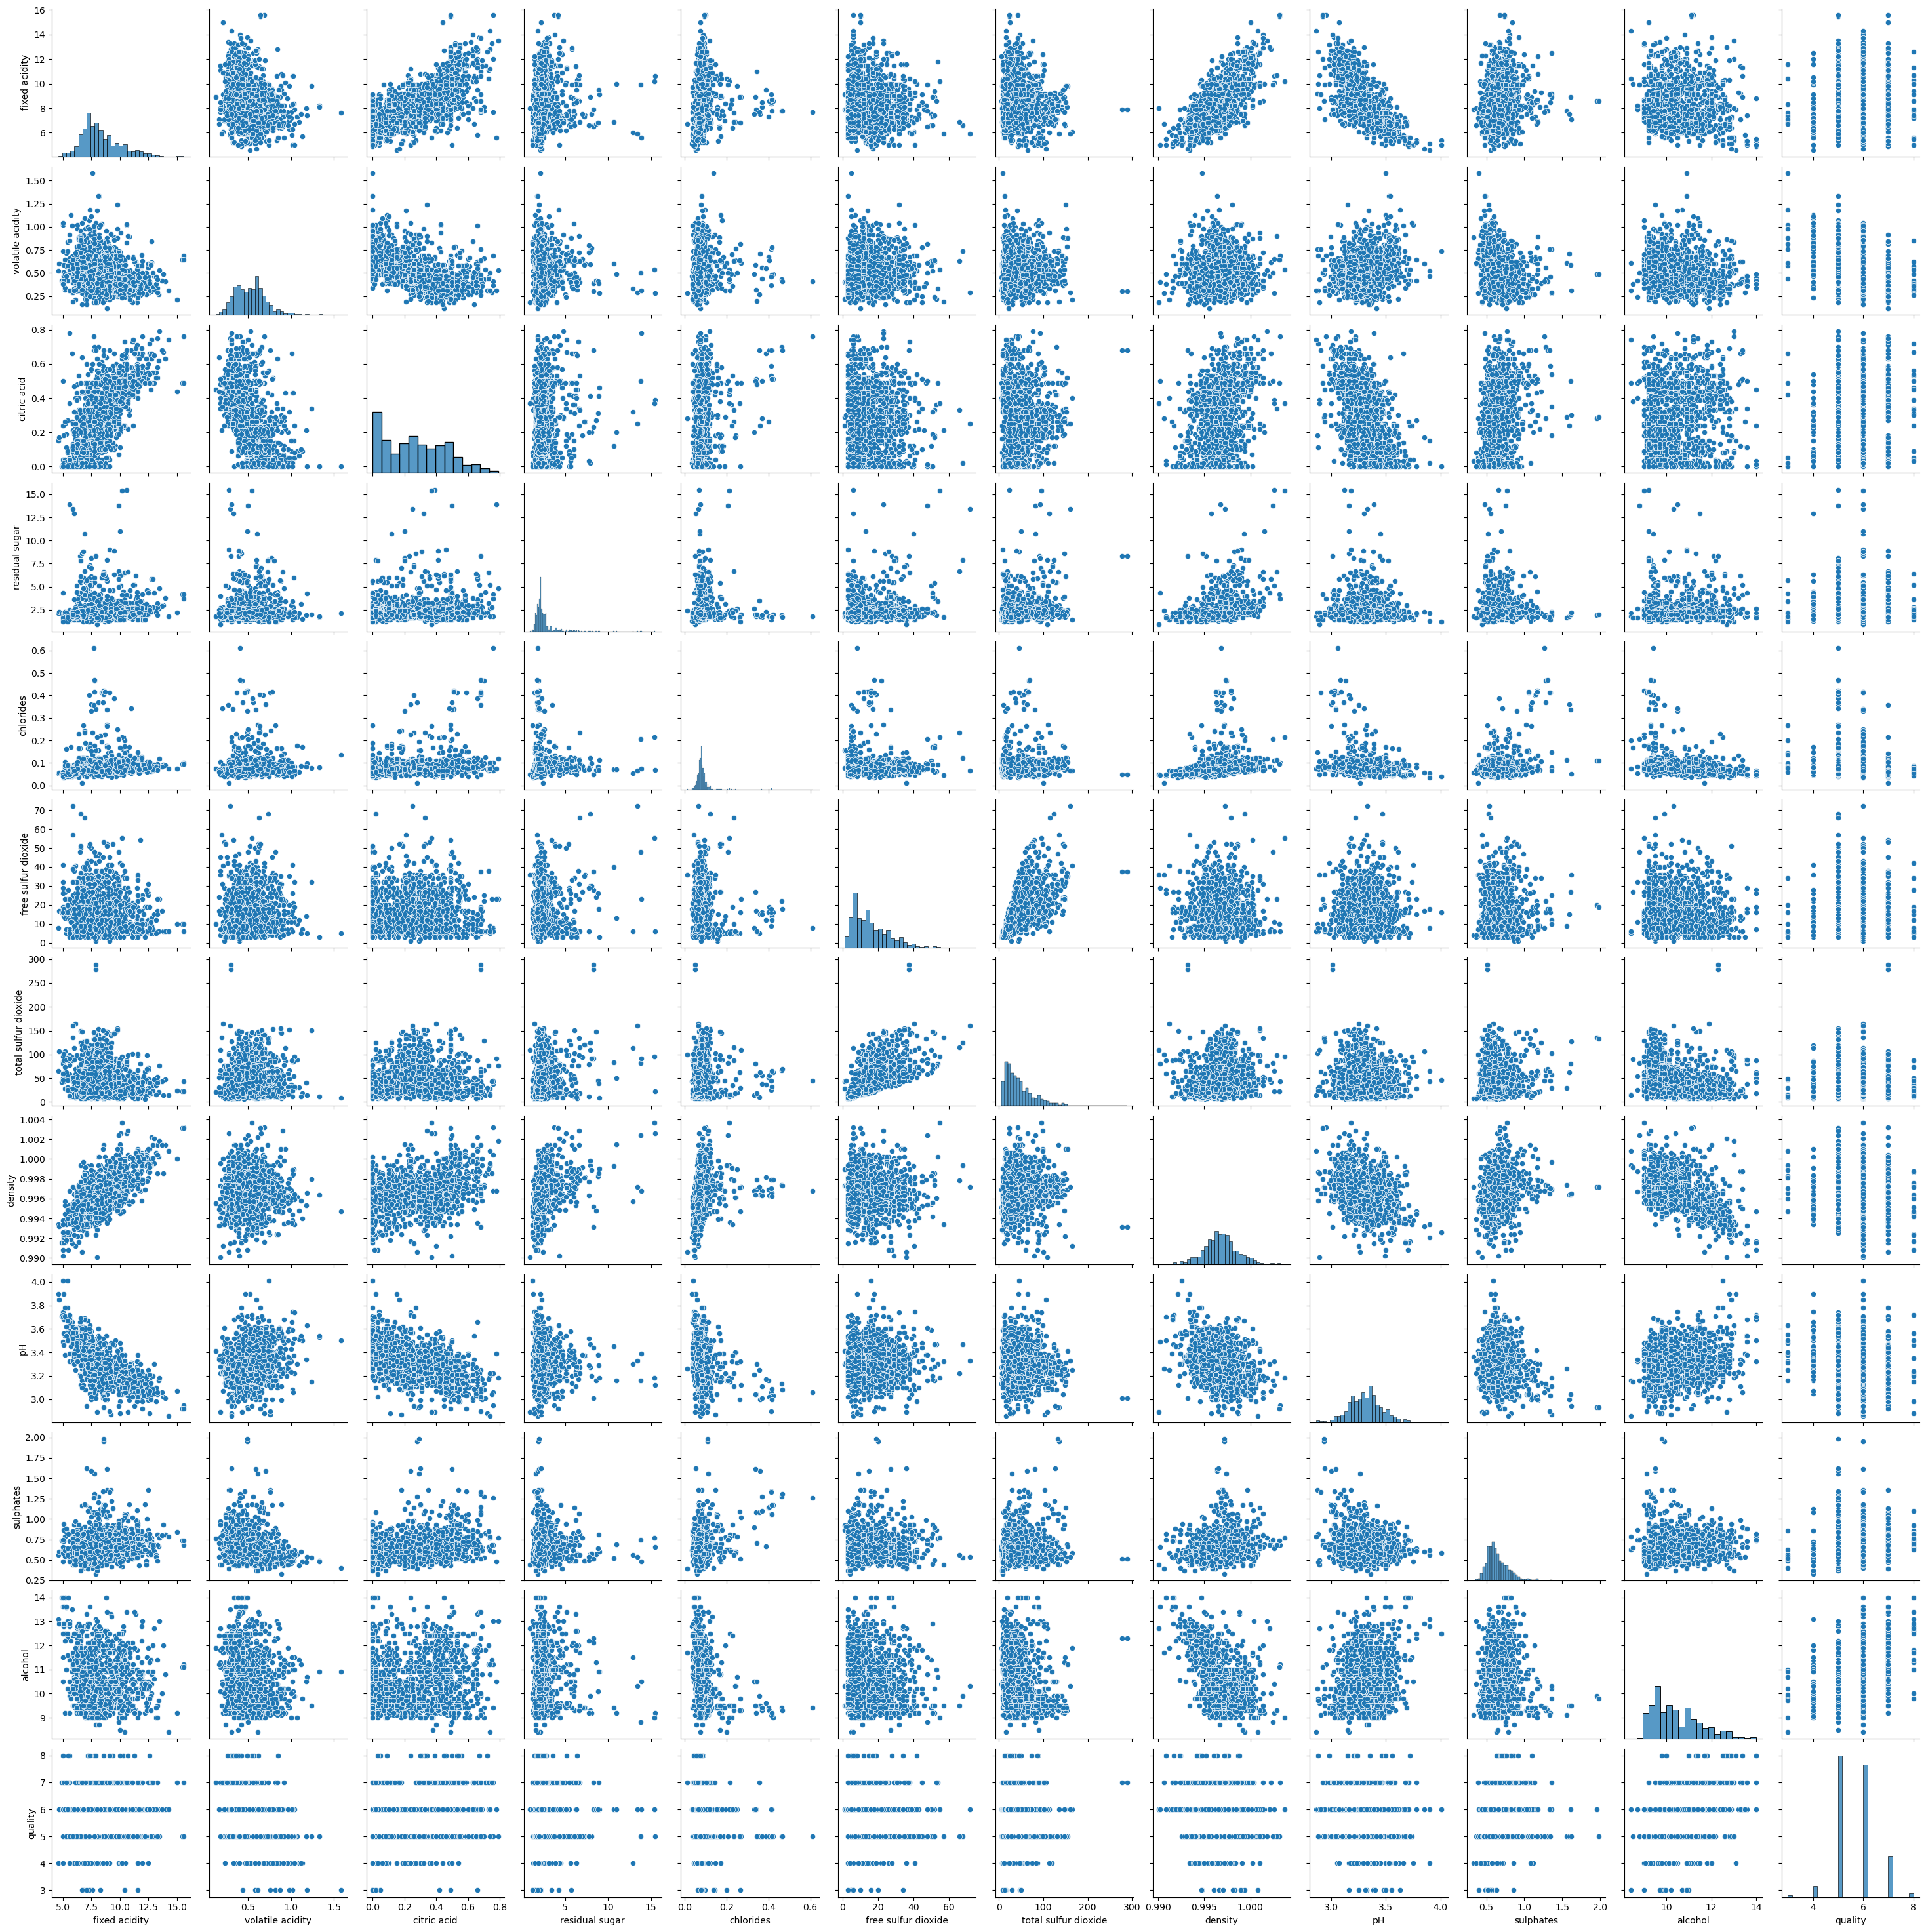

In [8]:
sn.pairplot(df)

<AxesSubplot:>

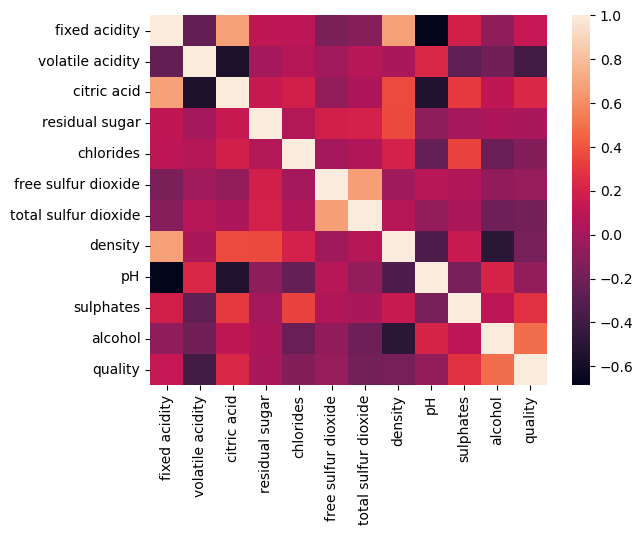

In [9]:
sn.heatmap(df.corr())

In [13]:
df['quality'].value_counts()

5    680
6    637
7    199
4     52
8     18
3     10
Name: quality, dtype: int64

## we have to predict quality class on basis of remaining columns

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
Y = df['quality']

In [32]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.2,random_state=0)

## In Y there is class

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()

## normalization(scalling) apply on train data

In [35]:
scale.fit(X_Train)

StandardScaler()

In [36]:
fnl_X_Train = scale.transform(X_Train)

In [37]:
fnl_X_Test = scale.transform(X_Test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
LR = LogisticRegression()
LR.fit(fnl_X_Train,Y_Train)
pred = LR.predict(fnl_X_Test)

In [41]:
confusion_matrix(Y_Test,pred)#(actual,predicted)

array([[ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  5,  5,  0,  0],
       [ 0,  0, 94, 37,  0,  0],
       [ 0,  0, 55, 74, 14,  0],
       [ 0,  0,  4, 24,  6,  0],
       [ 0,  0,  0,  1,  0,  0]])

In [42]:
accuracy_score(Y_Test,pred)

0.54375

In [43]:
DT = DecisionTreeClassifier()
DT.fit(fnl_X_Train,Y_Train)
pred = DT.predict(fnl_X_Test)

In [44]:
confusion_matrix(Y_Test,pred)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  6,  0,  0],
       [ 0,  2, 94, 33,  2,  0],
       [ 0,  4, 29, 98, 10,  2],
       [ 0,  1,  2, 14, 16,  1],
       [ 0,  0,  0,  0,  1,  0]])

In [45]:
accuracy_score(Y_Test,pred)

0.653125

In [46]:
RF = RandomForestClassifier()
RF.fit(fnl_X_Train,Y_Train)
pred = RF.predict(fnl_X_Test)

In [47]:
confusion_matrix(Y_Test,pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   5,   5,   0,   0],
       [  0,   1, 109,  20,   1,   0],
       [  0,   0,  32, 102,   9,   0],
       [  0,   0,   2,  19,  13,   0],
       [  0,   0,   0,   1,   0,   0]])

In [48]:
accuracy_score(Y_Test,pred)

0.7